# 붓꽃 유형 분류 
본 강의는 머신러닝을 사용하여 문제를 해결하는 전형적인 단계들과 전체적인 작업 구성을 이해하기 위한 것입니다. 이해를 돕기 위하여 꽃받침과 꽃잎의 길이와 너비를 기준으로 붓꽃의 유형을 판별(분류)하는 기능을 머신러닝을 이용하여 개발하고, 이를 웹/앱으로 사용할 수 있게 배포하는 예제를 사용합니다.

## 1. 머신러닝 패키지 준비

### 필요한 패키지 설치

In [ ]:
pip install flaml[notebook] --quiet

In [ ]:
pip install gradio --quiet

### 라이브러리 패키지 불러오기
이 단계는 필요에 따라 적절한 시점까지 미룰 수 있음

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import flaml

## 2. 데이터집합 로드와 탐색

### Iris 데이터집합 이해
https://archive.ics.uci.edu/ml/datasets/iris<br>
꽃받침과 꽃잎의 길이와 너비에 따른 붓꽃 유형 분류 데이터

4개의 feature와 1개의 레이블로 구성
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Setosa, Versicolour, Virginica

### Iris 데이터집합 읽어들이기

여기서는 Scikit-Learn이 제공하는 전처리된 데이터 사용.<br>
sklearn.datasets.load_iris()를 호출하면 Iris 데이터집합을 반환함.<br>
그 중 data는 4개의 feature들로 구성된 배열을, target은 label 배열을 의미.

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.data[:10], iris.target[:10]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

### 데이터집합 탐색

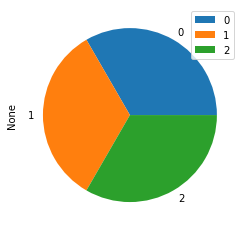

In [5]:
pd.Series(iris.target).value_counts().plot.pie(legend=True)

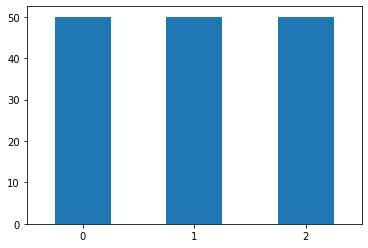

In [6]:
pd.Series(iris.target).value_counts().plot.bar(rot=0)

### 훈련과 시험/검증을 위해 데이터집합 분할

In [7]:
 X, y = iris.data, iris.target
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)

## 3. (분류) 모델 생성 및 평가

(features, label, 문제유형 [, 탐색시간])을 제공하면 가장 적합한 모델을 자동으로 탐색해주는 FLAML이라는 도구를 사용하여 붓꽃 분류 모델을 생성하고 그 성능을 평가해 보겠습니다.

In [8]:
aml = flaml.AutoML()
aml.fit(X_train, y_train, task="classification", time_budget=60)

[flaml.automl: 07-29 14:22:08] {2427} INFO - task = classification
[flaml.automl: 07-29 14:22:08] {2429} INFO - Data split method: stratified
[flaml.automl: 07-29 14:22:08] {2432} INFO - Evaluation method: cv
[flaml.automl: 07-29 14:22:08] {2551} INFO - Minimizing error metric: log_loss
[flaml.automl: 07-29 14:22:08] {2691} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 07-29 14:22:08] {2993} INFO - iteration 0, current learner lgbm
[flaml.automl: 07-29 14:22:08] {3127} INFO - Estimated sufficient time budget=564s. Estimated necessary time budget=14s.
[flaml.automl: 07-29 14:22:08] {3179} INFO -  at 0.1s,	estimator lgbm's best error=0.7083,	best estimator lgbm's best error=0.7083
[flaml.automl: 07-29 14:22:08] {2993} INFO - iteration 1, current learner lgbm
[flaml.automl: 07-29 14:22:08] {3179} INFO -  at 0.2s,	estimator lgbm's best error=0.7083,	best estimator lgbm's best error=0.7083
[flaml.automl

In [9]:
y_pred = aml.predict(X_test)
y_pred[:20]

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0])

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## 4. 데이터 앱 작성과 배포

In [11]:
def predict(sepal_length, sepal_width, petal_length, petal_width):
    data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    return ["Setosa", "Versicolour", "Virginica"][aml.predict(data)[0]]

In [12]:
import gradio as gr
slider = gr.components.Slider
means = iris.data.mean(axis=0)
sepal_length= slider(maximum=10, value=round(means[0]), label='꽃받침 길이')
sepal_width = slider(maximum=10, value=round(means[1]), label='꽃받침 너비')
petal_length= slider(maximum=10, value=round(means[2]), label='꽃잎 길이')
petal_width = slider(maximum=10, value=round(means[3]), label='꽃잎 너비')

gr.Interface(predict, 
             [sepal_length, sepal_width, petal_length, petal_width], "label",
             allow_flagging='never', live=True).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://12760.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7feb1bc3dd90>,
 'http://127.0.0.1:7860/',
 'https://12760.gradio.app')

## 복습



본 강의에서는 인공지능을 이용한 문제 해결의 전형적인 절차와 주요 구성 단계를 붓꽃 유형 분류 문제를 기준으로 소개하였습니다. Scikit-Learn이 제공하는 Iris 데이터집합과 FLAML이 제공하는 최적 머신러닝 모델 자동 판별 기능으로 매우 적은 노력으로 머신러닝을 활용한 문제 해결의 모든 단계를 효과적으로 해결할 수 있었습니다.<br><br>
그러나 머신러닝을 활용하는 대부분의 문제는 다음과 같은 이유로 예제와 같이 손쉽게 해결되지는 않습니다.<br>
1. 데이터집합이 머신러닝에 적합한 상태로 준비되어 있지 않은 경우가 많습니다. 데이터에 내재하는 패턴을 학습하기에 부족할 정도로 데이터가 적은 양이거나, 누락된 값(결측치)이 곳곳에 있거나, 데이터의 값이나 개수가 불균형적인 경우가 많습니다. 양질의 데이터가 있어야 좋은 머신러닝 모델을 얻을 수 있습니다. 이를 위해 다양한 데이터 공학(data engineering) 기법이 적용되어야 합니다.<br><br>
2. 문제와 데이터 유형에 따라 매우 다른 유형의 머신러닝 알고리듬을 사용해야 하며, 동일한 알고리듬을 사용하더라도 그 알고리듬의 동작을 최적화하기 위해 다양한 하이퍼매개변수(hyperparameter)의 값을 찾아야할 때가 있습니다. 본 예제에서는 이 과정을 자동화할 수 있는 고급의 AutoML 도구인 FLAML을 사용하였습니다. (향후에는 AutoKeras도 사용하게 될 것입니다.) 그러나 실제 프로젝트에서는 FLAML이 찾아준 모델보다 더 좋은 성능의 모델을 필요로 하는 경우도 있고, 이를 위해 다양한 머신러닝 알고리듬과 그들의 동작 특성, 관련된 하이퍼매개변수, 그리고 이들을 최적화하는 방법을 학습해야 합니다.<br><br>
3. 소프트웨어 프로젝트에서 머신러닝은 소프트웨어 시스템이 사용하는 하나 이상의 기능(예측)을 제공할 뿐 그 자체로 완성된 프로젝트가 아닙니다. 본 예제에서는 Gradio를 사용하여 웹 브라우저에서 사용할 수 있는 간단한 데이터 웹/앱을 매우 간편하게 개발하였습니다. 그러나 실제 프로젝트에서는 여러 머신러닝 모델과 관련된 데이터를 서버 환경에 유지하고, 클라이언트(웹이나 앱)로부터 발생하는 요청을 확장성 있고, 안전하고, 효율적으로 동작하게 지원하는 풀스택(full-stack) 개발을 요구하는 경우가 많습니다.<br>

이러한 내용들은 AI/ML개론 학기가 진행됨에 따라 소프트웨어 개발 기법을 다루는 여러 교과목과 연계하여 차차 학습하게될 것입니다. 어떤 경우에든 머신러닝은 많은 흥미로운 문제들에 대한 매우 효과적인 해결책을 제공하는 매력적인 기술이며, 이 기술을 활용하는 데 고등수학이 필요하지도 않습니다. 열린 마음으로 즐겁게 하나씩 문제를 해결해 나가다보면 큰 발전을 이룰 수 있을 것입니다.